In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

In [12]:
import string

In [5]:
df=pd.read_csv("disneyland_reviews.csv")
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
9995,642801343,5,2018-12,United States,Disneyland truly is a magical place! Christmas...,Disneyland_California
9996,642754983,5,2019-1,Australia,"So if you delight in joining 85,000 other folk...",Disneyland_California
9997,642743152,5,2019-1,Spain,we visitied the Disneyland park for 2 days. Ev...,Disneyland_California
9998,642735658,5,2018-11,United States,Disneyland is by far the Happiest Place on Ear...,Disneyland_California


In [6]:
#dropping missing or null values
df=df.dropna().reset_index()
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [7]:
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')


In [13]:
# 1. Basic information about the dataset
print(df.info())

# 2. Checking for missing values
print(df.isnull().sum())



#  Basic statistics of numerical columns
print(df.describe())

# Data Preprocessing for Review Text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = text.strip()
    return text

df['Cleaned_Review_Text'] = df['Review_Text'].apply(clean_text)

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              9986 non-null   int64 
 1   Review_ID          9986 non-null   int64 
 2   Rating             9986 non-null   int64 
 3   Year_Month         9986 non-null   object
 4   Reviewer_Location  9986 non-null   object
 5   Review_Text        9986 non-null   object
 6   Branch             9986 non-null   object
dtypes: int64(3), object(4)
memory usage: 624.1+ KB
None
index                0
Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64
             index     Review_ID       Rating
count  9986.000000  9.986000e+03  9986.000000
mean   4994.477068  3.612845e+08     4.208792
std    2885.567722  1.725609e+08     0.940369
min       0.000000  3.530053e+06     1.000000
25%    2496.250

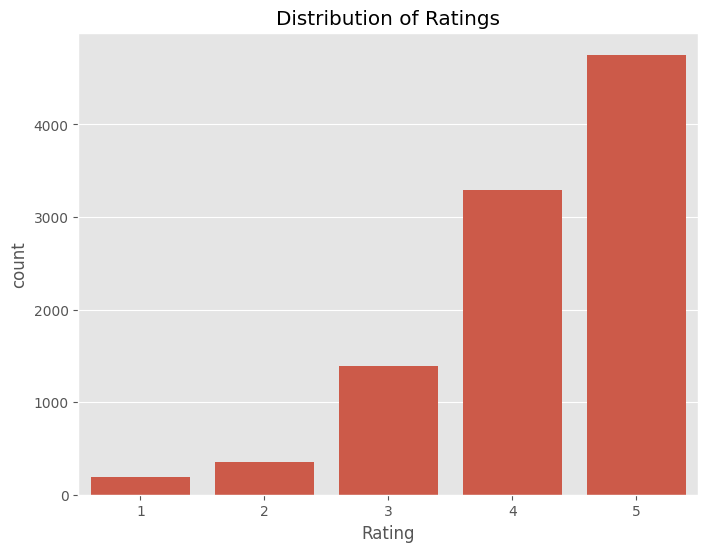

In [14]:
#Exploratory Data Analysis
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.show()

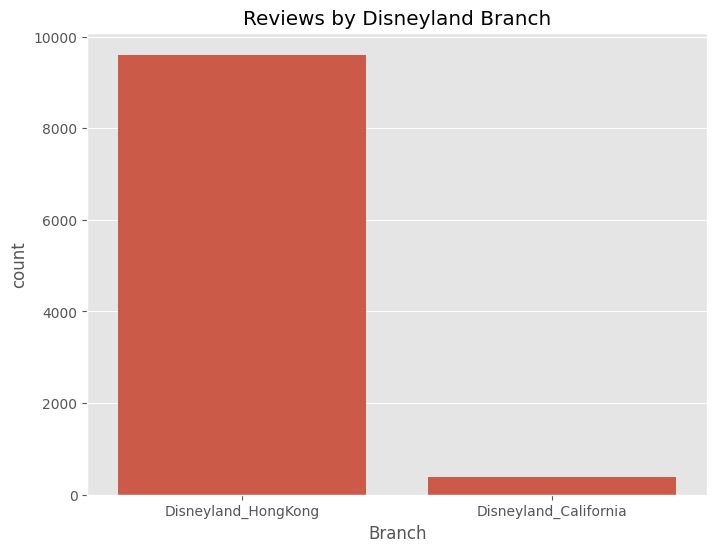

In [15]:
# Reviews by Branch
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Branch')
plt.title('Reviews by Disneyland Branch')
plt.show()


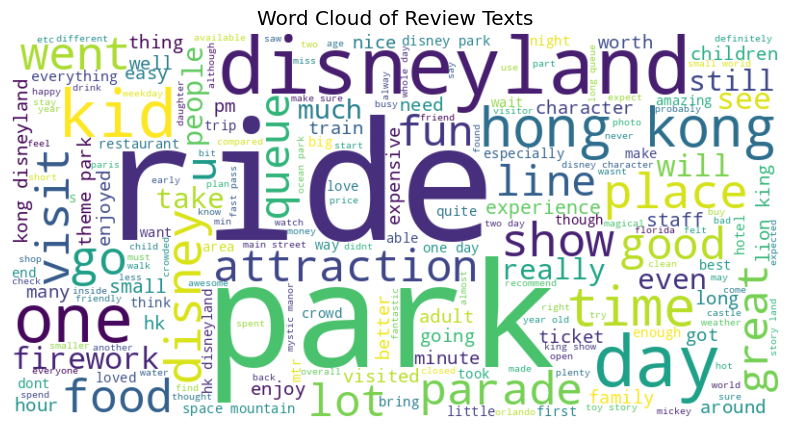

In [16]:

# Word Cloud for the most frequent words in the reviews
all_reviews = ' '.join(df['Cleaned_Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


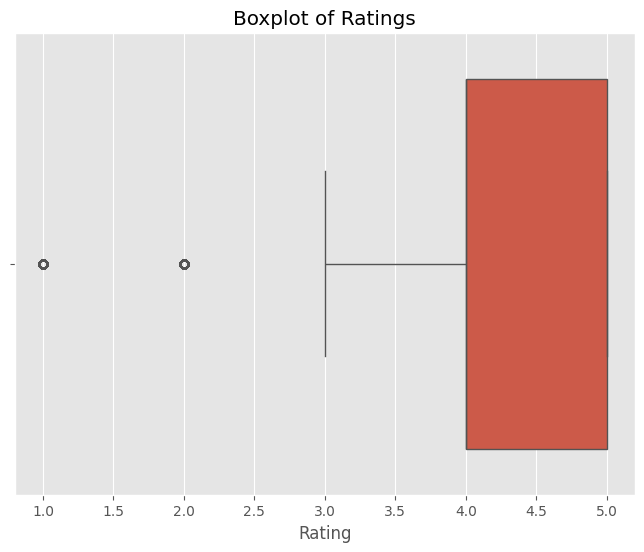

In [17]:

# Checking for outliers in Ratings
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot of Ratings')
plt.show()

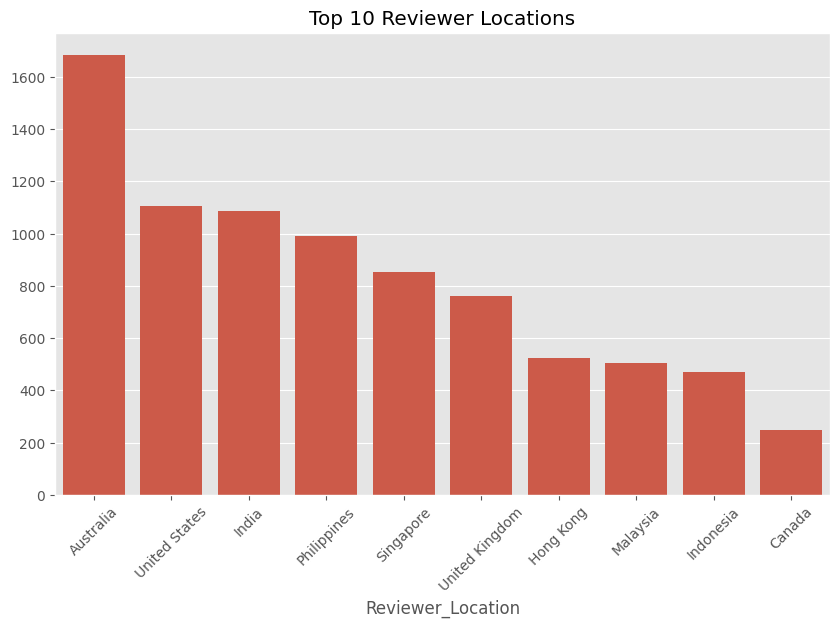

In [18]:
#  Checking the top reviewer locations
top_locations = df['Reviewer_Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Reviewer Locations')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Importing necessary libraries for further analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Download NLTK data (VADER lexicon for sentiment analysis)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# new data frame with split value columns
new = df["Year_Month"].str.split("-", n = 1, expand = True)

# making separate year column from new data frame
df["Year"]= new[0]

# making separate mounth column from new data frame
df["Mounth"]= new[1]

# Dropping old feature
df.drop(columns =["Year_Month"], inplace = True)

In [36]:
print(df)

      index  Review_ID  Rating     Reviewer_Location  \
0         0  670772142       4             Australia   
1         1  670682799       4           Philippines   
2         2  670623270       4  United Arab Emirates   
3         3  670607911       4             Australia   
4         4  670607296       4        United Kingdom   
...     ...        ...     ...                   ...   
9995   9995  642801343       5         United States   
9996   9996  642754983       5             Australia   
9997   9997  642743152       5                 Spain   
9998   9998  642735658       5         United States   
9999   9999  642725959       5                 India   

                                            Review_Text  \
0     If you've ever been to Disneyland anywhere you...   
1     Its been a while since d last time we visit HK...   
2     Thanks God it wasn   t too hot or too humid wh...   
3     HK Disneyland is a great compact park. Unfortu...   
4     the location is not in the

In [38]:
# Rename the 'Mounth' column to 'Month'
df.rename(columns={'mounth': 'month'}, inplace=True)

# Verify the change
print(df.columns)

Index(['index', 'Review_ID', 'Rating', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Cleaned_Review_Text', 'Word_Count', 'Char_Count', 'year',
       'month'],
      dtype='object')


In [40]:
# First, handle missing values (None or NaN) in the 'month' column.
# You can either fill missing values with a placeholder (e.g., 0) or drop rows with NaN in the 'month' column.

# Option 1: Fill NaN values with a placeholder (e.g., 1 for January or another placeholder like 0)
df['month'] = df['month'].fillna(0)

# Option 2: Drop rows with NaN in 'month' (if missing months should be removed)
# df.dropna(subset=['month'], inplace=True)

# Convert 'month' column to integers
df['month'] = df['month'].astype(int)

# Create 'quarter' based on the value of 'month'
df['quarter'] = df['month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))

# Verify the output
print(df[['month', 'quarter']])

      month  quarter
0         4        2
1         5        2
2         4        2
3         4        2
4         4        2
...     ...      ...
9995     12        4
9996      1        1
9997      1        1
9998     11        4
9999     12        4

[9986 rows x 2 columns]


In [41]:
df['Review_Text'].values[2:3]


array(['Thanks God it wasn   t too hot or too humid when I was visiting the park   otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn   t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn   t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand   even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.'],
      dtype=object)

In [42]:
df['review length']=df['Review_Text'].apply(lambda x:len(x))


In [48]:
#sentiment analysis
features = df['Review_Text'].values
#===
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
#===
df3=pd.DataFrame()
df3['reviews']=processed_features
#=======
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity
   # Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)
# getting the score if its positive/negative/neutral
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,reviews,Subjectivity,Polarity,Analysis
0,if you ve ever been to disneyland anywhere you...,0.561481,0.239352,Positive
1,its been while since last time we visit hk dis...,0.459783,0.205797,Positive
2,thanks god it wasn too hot or too humid when w...,0.434857,0.119238,Positive
3,hk disneyland is great compact park unfortunat...,0.512143,0.189286,Positive
4,the location is not in the city took around 1 ...,0.437500,0.266667,Positive
...,...,...,...,...
9981,disneyland truly is magical place christmas en...,0.686667,0.390000,Positive
9982,so if you delight in joining 85 000 other folk...,0.665517,0.170833,Positive
9983,we visitied the disneyland park for 2 days eve...,0.608333,0.356250,Positive
9984,disneyland is by far the happiest place on ear...,0.544877,0.253889,Positive


In [49]:
df['sentiment']=df3['Analysis']
df['Sentiment']=df['Rating'].apply(lambda x:'Negative' if x<3 else np.nan)
df['Sentiment']=df['Sentiment'].fillna(df['sentiment'])
#==
df['Reviews_Text']=df3['reviews']
#====
df=df.drop(['sentiment','Review_ID'],axis=1)

In [51]:
df_copy=df.copy()
df.head()

,index,Rating,Reviewer_Location,Review_Text,Branch,Cleaned_Review_Text,Word_Count,Char_Count,year,month,quarter,review length,Sentiment,Reviews_Text
0,0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,if youve ever been to disneyland anywhere youl...,59,322,2019,4,2,329,Positive,if you ve ever been to disneyland anywhere you...
1,1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,its been a while since d last time we visit hk...,163,912,2019,5,2,970,Positive,its been while since last time we visit hk dis...
2,2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god it wasn t too hot or too humid wh...,167,906,2019,4,2,938,Positive,thanks god it wasn too hot or too humid when w...
3,3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland is a great compact park unfortun...,91,475,2019,4,2,485,Positive,hk disneyland is great compact park unfortunat...
4,4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,the location is not in the city took around h...,30,158,2019,4,2,163,Positive,the location is not in the city took around 1 ...


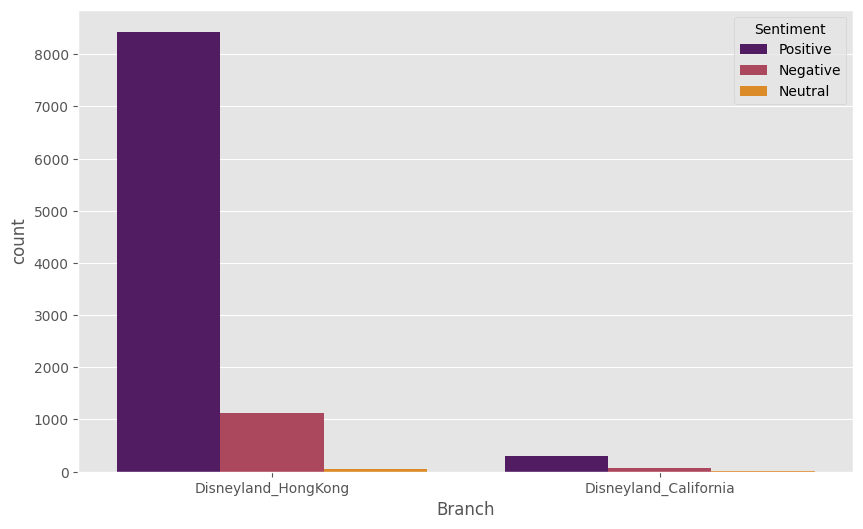

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='Sentiment',palette='inferno');

In [57]:
import pandas as pd
import re
from nltk.stem.snowball import SnowballStemmer
import spacy

# Step 1: Filter Negative Sentiment Reviews
df_dislike = df.loc[df['Sentiment'] == 'Negative']

# Step 2: Get the review text (drop duplicates and handle missing values)
# Convert all entries to strings and drop duplicates
review = df_dislike['Reviews_Text'].drop_duplicates().dropna().astype(str)

# Step 3: Collect all sentences into a list
all_sentences = review.tolist()

# Step 4: Tokenize the text into words (handle missing values, convert to strings)
lines = []
for line in all_sentences:
    words = line.split()  # Splitting each line into words
    for w in words:
        lines.append(w)

# Step 5: Clean the text using regular expressions (remove non-alphanumeric characters)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

# Step 6: Filter out empty strings after cleaning
lines2 = [word for word in lines if word != '']

# Step 7: Apply stemming using NLTK's SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
stem = [s_stemmer.stem(word) for word in lines2]

# Step 8: Remove stopwords using Spacy
nlp = spacy.load('en_core_web_sm')
stem2 = [word for word in stem if word not in nlp.Defaults.stop_words]

# Step 9: Create a DataFrame of the most frequent words
df = pd.DataFrame(stem2)
df_word_count = df[0].value_counts().head(20)
print(df_word_count)

# Step 10: Named Entity Recognition (NER) using Spacy
nlp.max_length = 2000000  # Increase max length if needed for large text data
str1 = " ".join(lines2)  # Join all words into a single string
doc = nlp(str1)

# Extract entities and labels
label = [(X.text, X.label_) for X in doc.ents]
df_entities = pd.DataFrame(label, columns=['Word', 'Entity'])

# Display top entities
print(df_entities.head())

# Function to display entity explanation
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

# Call function to show entities
show_ents(doc)


0
park          1093
ride          1044
disneyland     966
disney         927
day            691
veri           570
time           567
visit          464
food           435
small          412
kid            386
place          348
queue          339
onli           324
wait           322
kong           310
hong           306
line           287
like           284
disappoint     281
Name: count, dtype: int64
        Word    Entity
0      tokyo       GPE
1  hong kong       GPE
2     only 2  CARDINAL
3     2 days      DATE
4          1  CARDINAL
tokyo - GPE - Countries, cities, states
hong kong - GPE - Countries, cities, states
only 2 - CARDINAL - Numerals that do not fall under another type
2 days - DATE - Absolute or relative dates or periods
1 - CARDINAL - Numerals that do not fall under another type
no more than 30 - CARDINAL - Numerals that do not fall under another type
weekends - DATE - Absolute or relative dates or periods
1 day - DATE - Absolute or relative dates or periods
60 - CAR

In [60]:
df_entities['Entity'].value_counts()
negative= df_entities.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

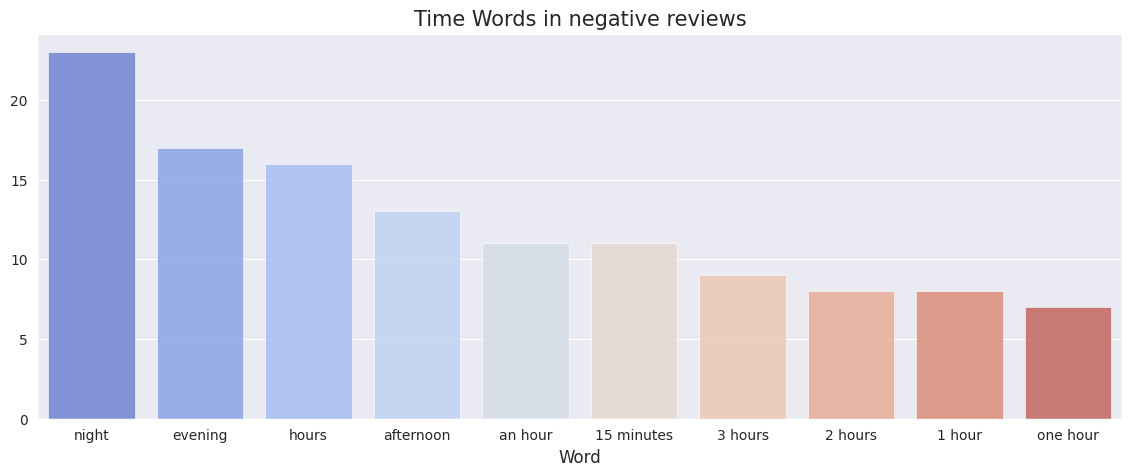

In [61]:
TIME = df_entities.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

Check for operations review after fireworks or during exit. Long waiting hours for rides


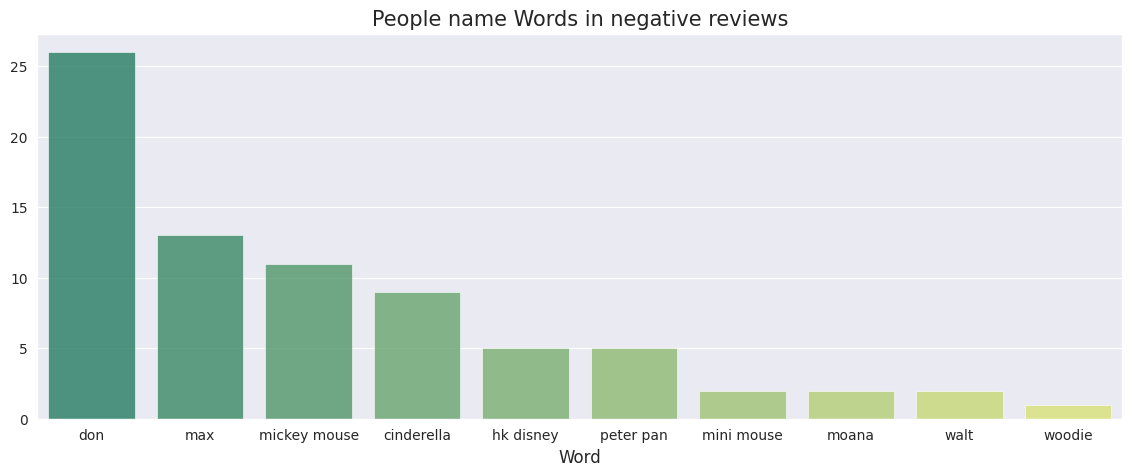

In [63]:
PERSON = df_entities.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="summer");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

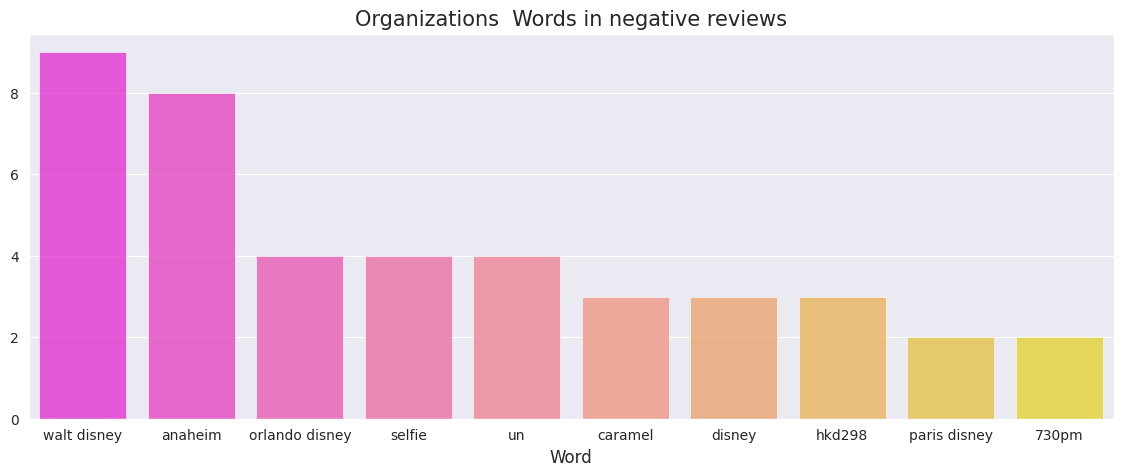

In [64]:
ORG = df_entities.query("Entity == 'ORG'")
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="spring");
plt.title('Organizations  Words in negative reviews',fontsize=15);
plt.show();

Check for any ride or sho reviews about the History of Walt Disney. Check for the reviews of Anaheim Discovery Inn & Suites At The Park in California

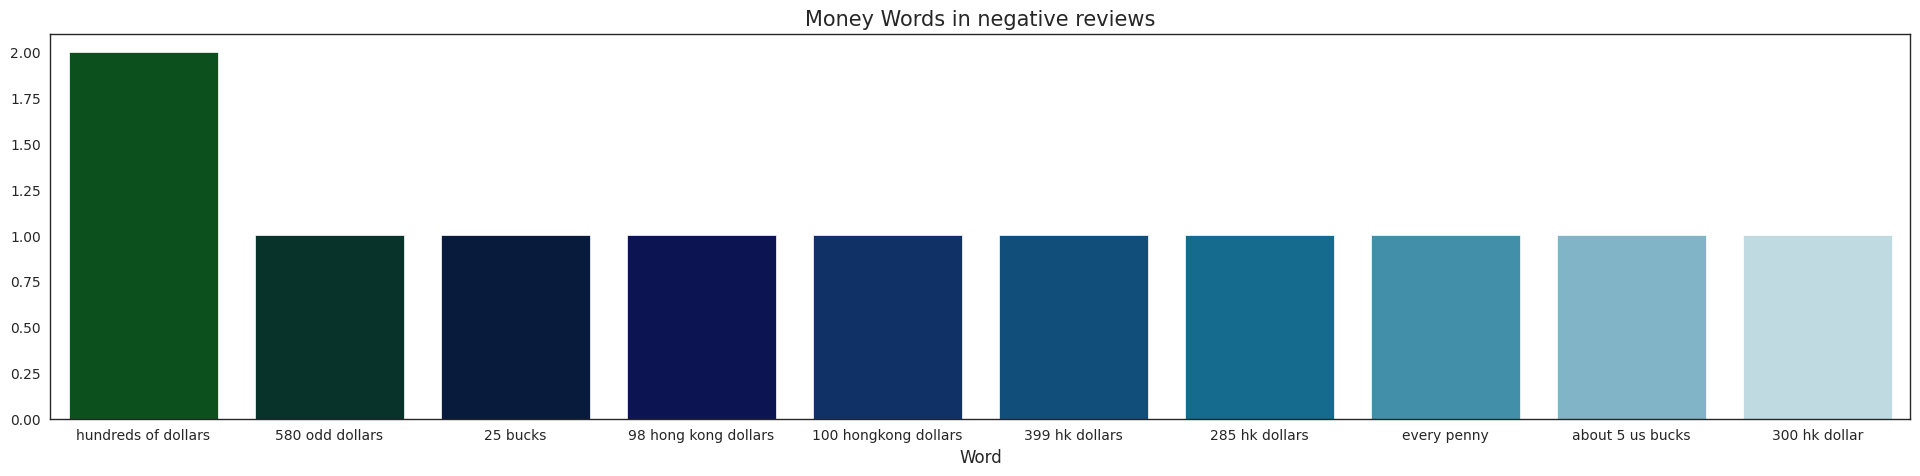

In [70]:
PRODUCT = df_entities.query("Entity == 'MONEY'")
PRODUCT =PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]
sns.set_style("white")
plt.figure(figsize=(24,5));
NORP = sns.barplot(x=PRODUCT.index,y= PRODUCT.values, alpha=1,palette="ocean");
plt.title('Money Words in negative reviews',fontsize=15);
plt.show();

Check for value for money reviews